In [ ]:
# PyTorch
import torch
import torch.nn as nn
#import functional as F 
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

# For data preprocess
import numpy as np
import pandas as pd
from pandas import DataFrame


# For plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams['font.sans-serif']=['SimHei'] #pyplot中文显示


In [60]:
'''
#让我这个大ai来看看有没有什么规律
 
train = pd.read_csv('C:/Users/62331/Desktop/ML/机组数据驱动的风电场短期风况预测/风场1/x26/2018-07-30.csv')  #训练集
#test = pd.read_csv('C:/Users/62331/Desktop/ML/机组数据驱动的风电场短期风况预测/测试集_初赛/风场1/x26/春_01.csv"') # 测试集
train=train.dropna()#读取数据，丢弃缺失值


# 进行画图主体部分
train.plot(x='time') 

# 设置 x 轴显示密度
tick_spacing = 10
#train.xaxis.set_major_locator(train.MultipleLocator(tick_spacing))
# 设置 x 坐标轴标签的显示内容和大小
#plt.xlabel('时间', fontsize=14)
# 设置 x 坐标轴刻度的旋转方向和大小
# rotation: 旋转方向
plt.xticks(rotation=90, fontsize=10)

#train.head(2000)
plt.figure(figsize=(10,8),dpi=900) 

plt.savefig('C:/Users/62331/Desktop/ML/机组数据驱动的风电场短期风况预测/first.jpg')
plt.show()

#显然没什么规律

'''

'\n#让我这个大ai来看看有没有什么规律\n \ntrain = pd.read_csv(\'C:/Users/62331/Desktop/ML/机组数据驱动的风电场短期风况预测/风场1/x26/2018-07-30.csv\')  #训练集\n#test = pd.read_csv(\'C:/Users/62331/Desktop/ML/机组数据驱动的风电场短期风况预测/测试集_初赛/风场1/x26/春_01.csv"\') # 测试集\ntrain=train.dropna()#读取数据，丢弃缺失值\n\n\n# 进行画图主体部分\ntrain.plot(x=\'time\') \n\n# 设置 x 轴显示密度\ntick_spacing = 10\n#train.xaxis.set_major_locator(train.MultipleLocator(tick_spacing))\n# 设置 x 坐标轴标签的显示内容和大小\n#plt.xlabel(\'时间\', fontsize=14)\n# 设置 x 坐标轴刻度的旋转方向和大小\n# rotation: 旋转方向\nplt.xticks(rotation=90, fontsize=10)\n\n#train.head(2000)\nplt.figure(figsize=(10,8),dpi=900) \n\nplt.savefig(\'C:/Users/62331/Desktop/ML/机组数据驱动的风电场短期风况预测/first.jpg\')\nplt.show()\n\n#显然没什么规律\n\n'

In [32]:
#处理数据
time_stamp=2
train = pd.read_csv('C:/Users/62331/Desktop/ML/机组数据驱动的风电场短期风况预测/风场1/x26/2018-07-30.csv')  #训练集
train_size=int(len(train)*0.7)
train=train.dropna()
train=train[['变频器电网侧有功功率', '外界温度', '风向', '风速']]
#train=train[['风速']]
valid = train[len(train)-train_size:]
train=train[0:len(train)-train_size]
'''
temperature = train['外界温度']
temperature = np.array(temperature)
temperature = torch.unsqueeze(torch.FloatTensor(temperature),dim=1)
wind_velocity=train['风速']
wind_velocity=np.array(wind_velocity)
wind_velocity=torch.unsqueeze(torch.FloatTensor(wind_velocity),dim=1)
wind_direction=train['风向']
wind_direction=np.array(wind_direction)
wind_direction=torch.unsqueeze(torch.FloatTensor(wind_direction),dim=1)
#讲真这个数据依我看好像没什么卵用
power=train['变频器电网侧有功功率']
power=np.array(power)
power=torch.unsqueeze(torch.FloatTensor(power),dim=1)
'''
x_train= []

y_train= []

for i in range(time_stamp, len(train)-3):
    x_train.append(train[i-time_stamp:i])
    y_train.append(train[i:i+1])

x_train = np.array(x_train)
y_train = np.array(y_train)


x_valid, y_valid = [], []
for i in range(time_stamp, len(valid)-3):
    x_valid.append(valid[i - time_stamp:i])
    y_valid.append(valid[i:i+1])
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)

x_train = x_train.reshape(-1, 1, 2) #将训练数据调整成pytorch中lstm算法的输入维度
y_train = y_train.reshape(-1, 1, 1)  #将目标值调整成pytorch中lstm算法的输出维度

 #将ndarray数据转换为张量，因为pytorch用的数据类型是张量

x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)



'''

x_train=torch.unsqueeze(torch.FloatTensor(x_train),dim=1)
x_valid=torch.unsqueeze(torch.FloatTensor(x_valid),dim=1)
y_train=torch.unsqueeze(torch.FloatTensor(y_train),dim=1)
y_valid=torch.unsqueeze(torch.FloatTensor(y_valid),dim=1)

'''
print(x_train.shape)
print(y_train.shape)


torch.Size([3440, 1, 2])
torch.Size([3440, 1, 1])


In [102]:
'''
#Tensorflow
# 超参数
epochs = 3
batch_size = 16
# LSTM 参数: return_sequences=True LSTM输出为一个序列。默认为False，输出一个值。
#True可以多层堆叠
# input_dim：输入单个样本特征值的维度
# input_length：输入的时间点长度
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_dim=x_train.shape[-1], input_length=x_train.shape[1]))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
'''

"\n#Tensorflow\n# 超参数\nepochs = 3\nbatch_size = 16\n# LSTM 参数: return_sequences=True LSTM输出为一个序列。默认为False，输出一个值。\n#True可以多层堆叠\n# input_dim：输入单个样本特征值的维度\n# input_length：输入的时间点长度\nmodel = Sequential()\nmodel.add(LSTM(units=100, return_sequences=True, input_dim=x_train.shape[-1], input_length=x_train.shape[1]))\nmodel.add(LSTM(units=50))\nmodel.add(Dense(1))\nmodel.compile(loss='mean_squared_error', optimizer='adam')\nmodel.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)\n"

In [35]:
class RNN (nn.Module):
    def __init__(self):
        super(RNN,self).__init__() #面向对象中的继
        self.lstm = nn.LSTM(2,6,2) #输入数据2个特征维度，6个隐藏层维度，2个LSTM串联，第二个LSTM接收第一个的计算结果
        self.out = nn.Linear(6,1) #线性拟合，接收数据的维度为6，输出数据的维度为1
    def forward(self,x):
        x1,_ = self.lstm(x)
        a,b,c = x1.shape
        out = self.out(x1.view(-1,c)) #因为线性层输入的是个二维数据，所以此处应该将lstm输出的三维数据x1调整成二维数据，最后的特征维度不能变
        out1 = out.view(a,b,-1) #因为是循环神经网络，最后的时候要把二维的out调整成三维数据，下一次循环使用
        return out1
rnn = RNN()

#参数寻优，计算损失函数

optimizer = torch.optim.Adam(rnn.parameters(),lr = 0.02)
loss_func = nn.MSELoss()

 

 #三、训练模型
1
for i in range(1000):
    var_x = Variable(x_train).type(torch.FloatTensor)
    var_y = Variable(y_train).type(torch.FloatTensor)
    out = rnn(var_x)
    loss = loss_func(out,var_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1)%100==0:
        print('Epoch:{}, Loss:{:.5f}'.format(i+1, loss.item()))

Epoch:100, Loss:0.08154
Epoch:200, Loss:0.07962
Epoch:300, Loss:0.07916
Epoch:400, Loss:0.07866
Epoch:500, Loss:0.07856
Epoch:600, Loss:0.07852
Epoch:700, Loss:0.07848
Epoch:800, Loss:0.07845
Epoch:900, Loss:0.07843
Epoch:1000, Loss:0.07841


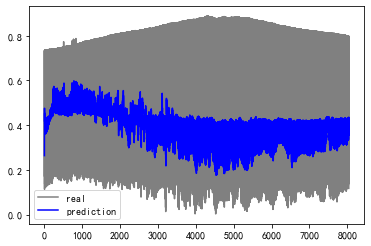

In [36]:
dataX1 = x_valid.reshape(-1,1,2)
dataX2 = torch.from_numpy(dataX1)
var_dataX = Variable(dataX2).type(torch.FloatTensor)

pred = rnn(var_dataX)

pred_test = pred.view(-1).data.numpy()  #转换成一维的ndarray数据，这是预测值

y_valid=y_valid.reshape(1,-1)[0]


 

#五、画图检验
plt.plot(y_valid, 'grey', label='real')

plt.plot(pred.view(-1).data.numpy(), 'b', label='prediction')

plt.legend(loc='best')

